# Project Name = Red Wine Quality Prediction

# Overview

### About The Dataset:

This Wine Quality dataset consists of information about the various physicochemical properties of  RED wines. The dataset is based on red variant of the Portuguese "Vinho Verde" wine and contains labels for the quality of each individual wine sample. The label is in the range of 0 to 10.


### FEATURES DESCRIPTION:
* Fixed acidity	       :  Most acids involved with wine or fixed or nonvolatile
* Volatile acidity	   :  The amount of acetic acid in wine
* Citric acid 	       :  Found in small quantities, citric acid can add 'freshness' and flavor to wines
* Residual sugar 	   :  The amount of sugar remaining after fermentation
* Chlorides 	       :  The amount of salt in the wine
* Free sulfur dioxide  :  So2 is used for prevention of wine by oxidation and microbial spoilage
* Total sulfur dioxide :  Amount of free and bound forms of S02
* Density	           :  The density of water is close to that of water depending on the percent alcohol and sugar content
* pH	               :  Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
* Sulphates 	       :  A wine additive which can contribute to sulfur dioxide gas (S02)
* Alcohol 	           :  The percent of alcohol content of the wine
* Quality	           :  Rating scale  between 0 and 10!

# Table Of Content

* Importing Essential Libraries
* Importing Data
* EDA and Feature Engineering
    * Dropping Features
    * Visualizations
    * Checking for Outliers
    * Optimizing Outliers
    * Transformation
    * Identifying Correlations
    * Highest Correlated Features with the Target label
* Splitting the Dataset
* Scaling Features
* Classification Model Building

# Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [ ]:
# loading the dataset
wine = pd.read_csv('/content/drive/MyDrive/Projects/ML project/Red Wine Quality Dataset.csv')

In [ ]:
# display first 5 rows
wine.head(10)

,sr. no.,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,6,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,8,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,9,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,10,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
wine.shape # 1599 rows # 12 columns

(1599, 13)

In [ ]:
# checking Datatypes
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sr. no.               1599 non-null   int64  
 1   fixed.acidity         1599 non-null   float64
 2   volatile.acidity      1599 non-null   float64
 3   citric.acid           1599 non-null   float64
 4   residual.sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free.sulfur.dioxide   1599 non-null   float64
 7   total.sulfur.dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


# Data Cleaning

### **Missing Values**

In [ ]:
wine.isnull().sum() # No missing values

sr. no.                 0
fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* No missing Values

### **Droping irrelavent columns**

In [ ]:
# drop sr. no. columns
wine.drop('sr. no.', inplace = True, axis = 1)

# Data Analysis and Visualization

###  **Statistical analysis**

In [ ]:
wine.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **Unique Counts of Wine Quality**

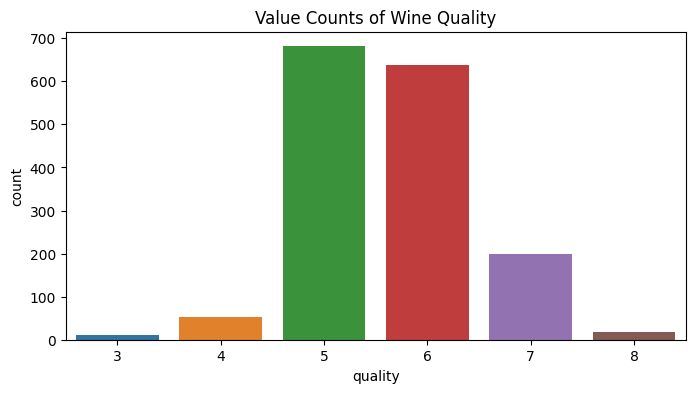

In [ ]:
# number of values for wine quality
plt.figure(figsize = (8, 4))
sns.countplot(x=wine['quality'])
plt.title('Value Counts of Wine Quality')
plt.show()

* The number of ratings for wine quality '5' and '6' are much larger than that of 3 , 4 and 8.
* Thus to simplify the target column and avoid unbalanced dataset problems I will classify the target column after futher analysis

### **Bar plot visualization**

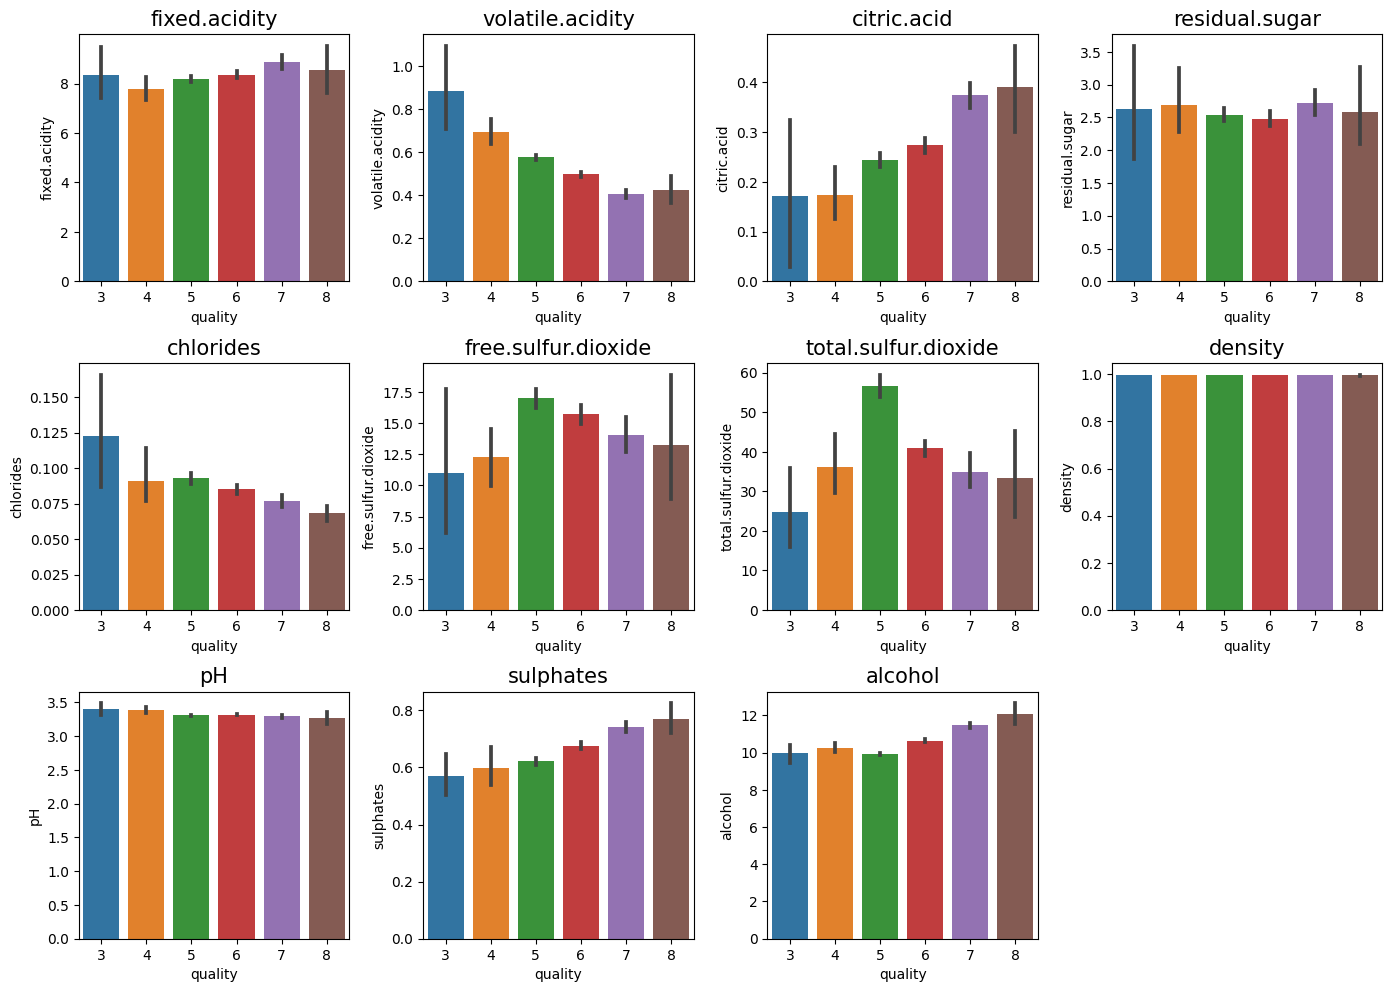

In [ ]:
# every independent feature relation with wine quality column
fig = plt.figure(figsize=(14,10))

for index, column in enumerate(wine.columns.drop(['quality'])):
  plt.subplot(3,4, index + 1)
  sns.barplot(x= 'quality', y = column, data = wine)
  plt.title(column, fontsize = 15)
fig.tight_layout(pad=1.0)

* **We can see the following significant relation:**
 * Volatile acidity, Chlorides and Quality is showing the inverse relation.
 * Citric acid, Sulphates and Alcohole with Quality are showing the positive relation.
 * other features are very less comparable with Quality.

### Outliers Detection and Removal

In [ ]:
# boxplot
#for col in list(wine.columns.drop(['quality'])):
   # sns.boxplot(x = wine['quality'], y = col, data = wine)
   # plt.show()

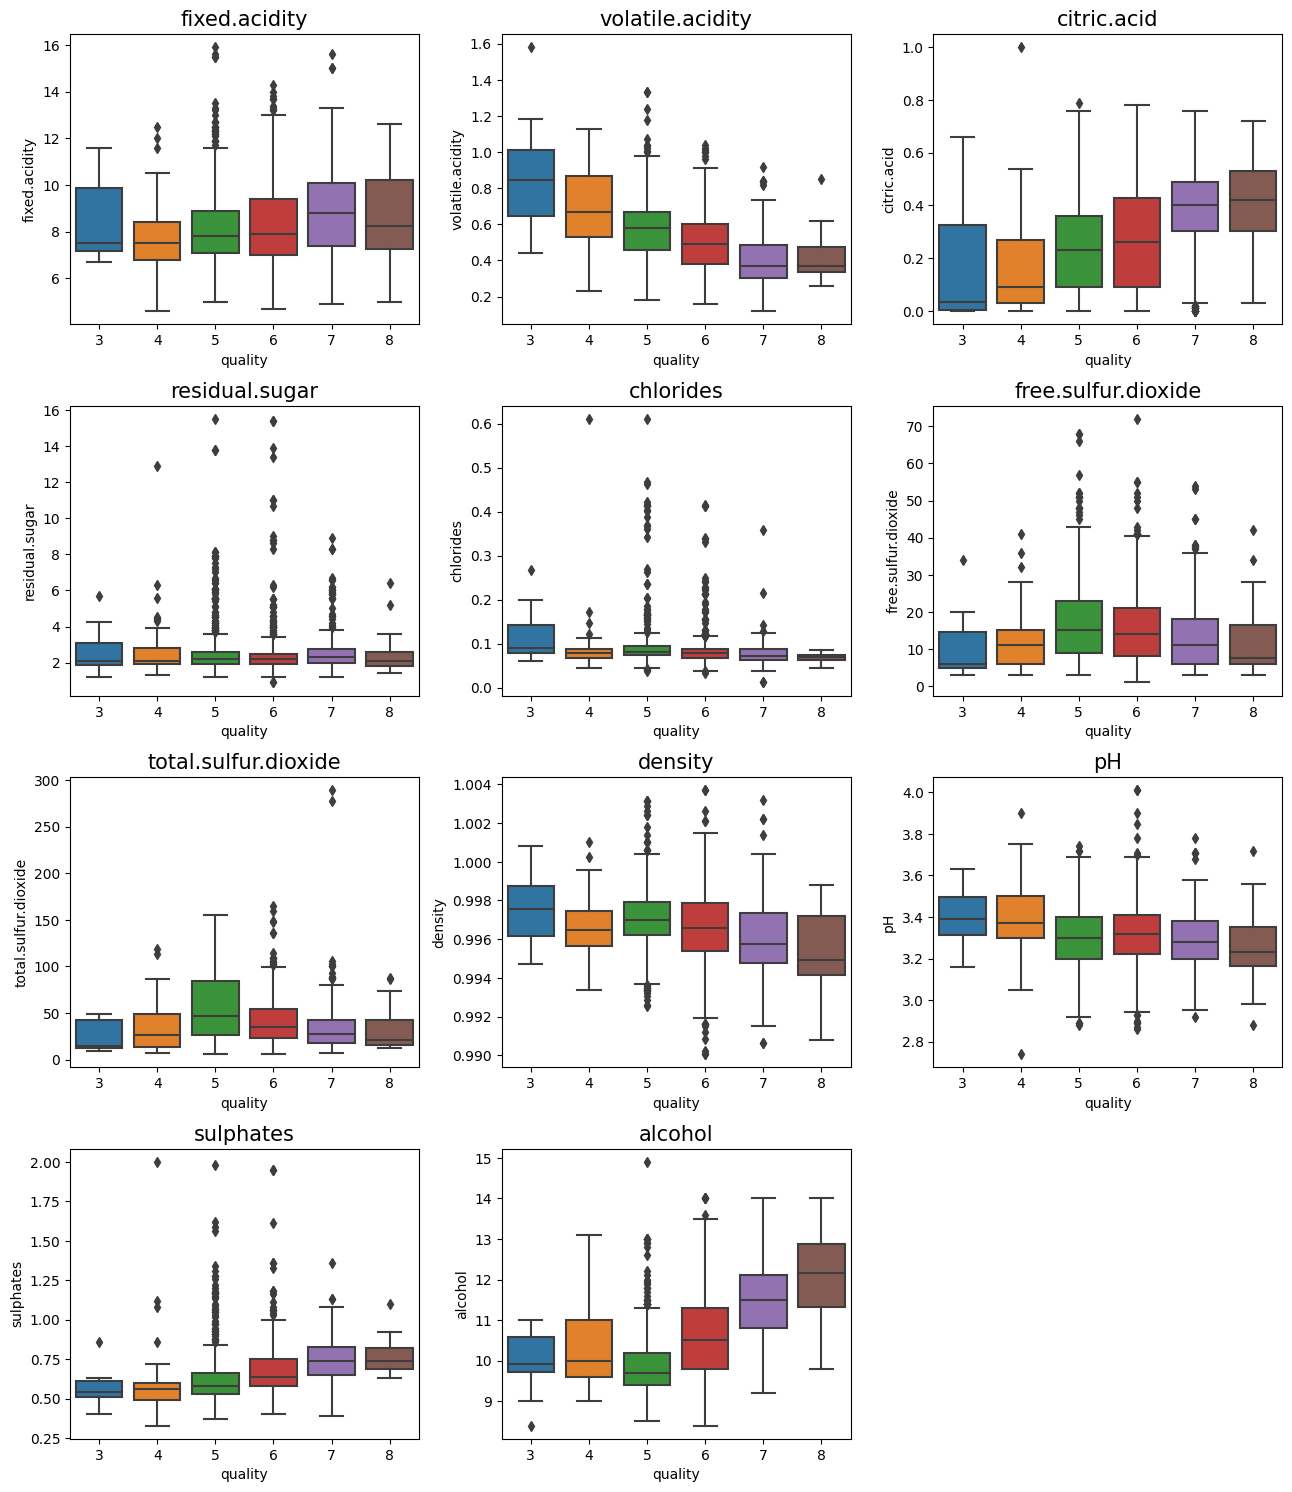

In [ ]:
# every independent feature relation with wine quality column
fig = plt.figure(figsize=(13,15))

for index, column in enumerate(wine.columns.drop(['quality'])):
  plt.subplot(4, 3, index + 1)
  sns.boxplot(x = wine['quality'], y = column, data = wine)
  plt.title(column, fontsize = 15)
fig.tight_layout(pad=1.0)

**Removing Outliers by Winsorizing Technique**

In [ ]:
for col in list(wine.columns.drop(['quality'])):
  q1 = wine[col].quantile(0.25)
  q3 = wine[col].quantile(0.75)
  iqr = q3 - q1
  lower_limit = q1 - (1.5 *iqr)
  upper_limit = q3 + (1.5 *iqr)

  for value in wine[col]:
    if value > upper_limit:
      wine[col] = np.where(wine[col] > upper_limit, upper_limit, wine[col])
    else:
      wine[col] = np.where(wine[col] < lower_limit, lower_limit, wine[col])

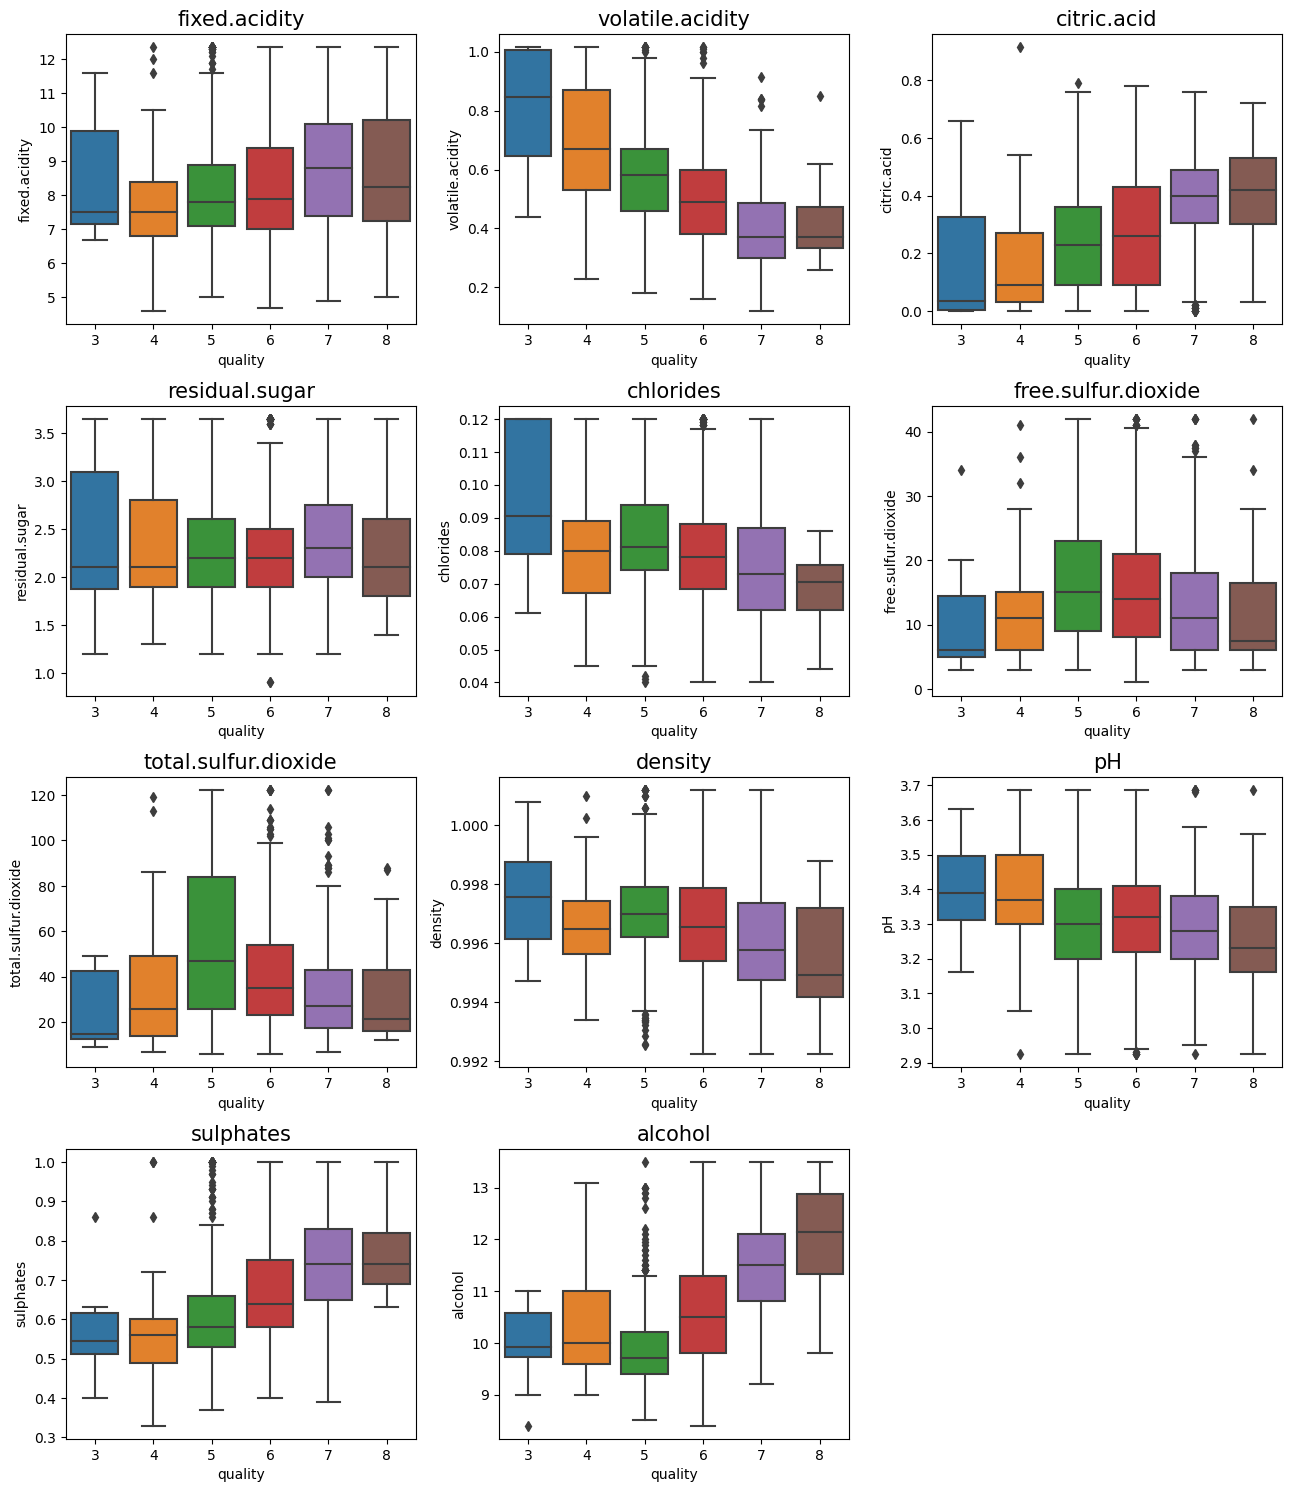

In [ ]:
# every independent feature relation with wine quality column
fig = plt.figure(figsize=(13,15))

for index, column in enumerate(wine.columns.drop(['quality'])):
  plt.subplot(4, 3, index + 1)
  sns.boxplot(x = wine['quality'], y = column, data = wine)
  plt.title(column, fontsize = 15)
fig.tight_layout(pad=1.0)

###  Normal Distribution

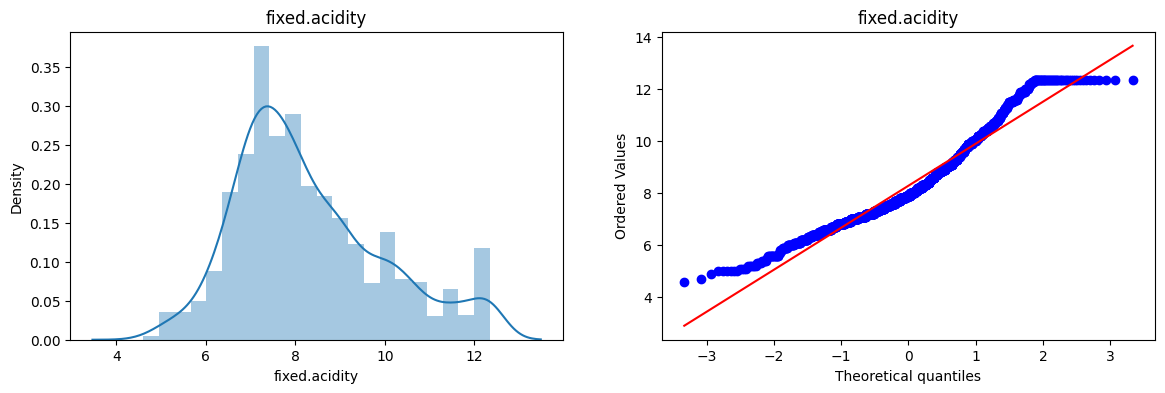

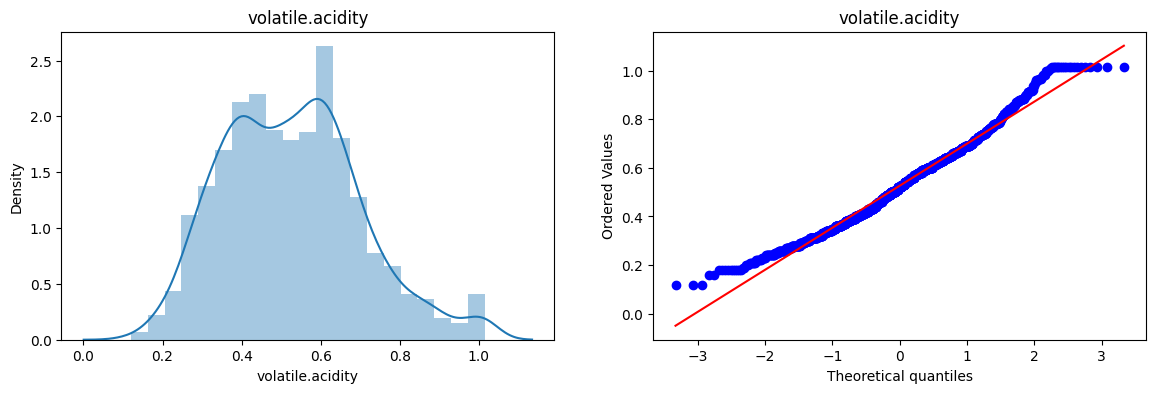

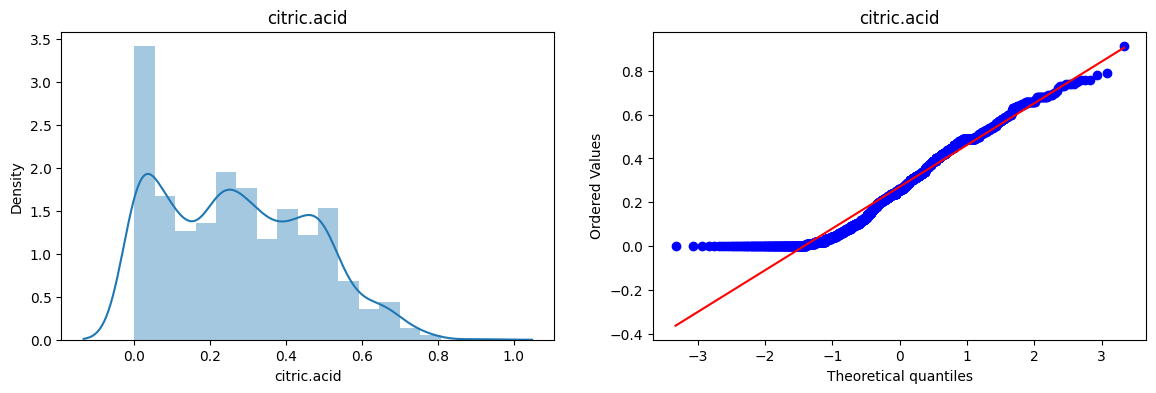

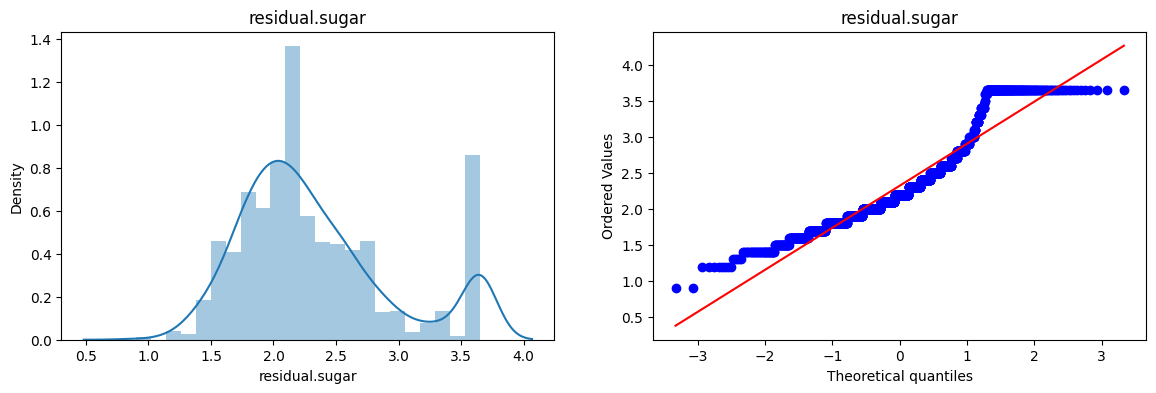

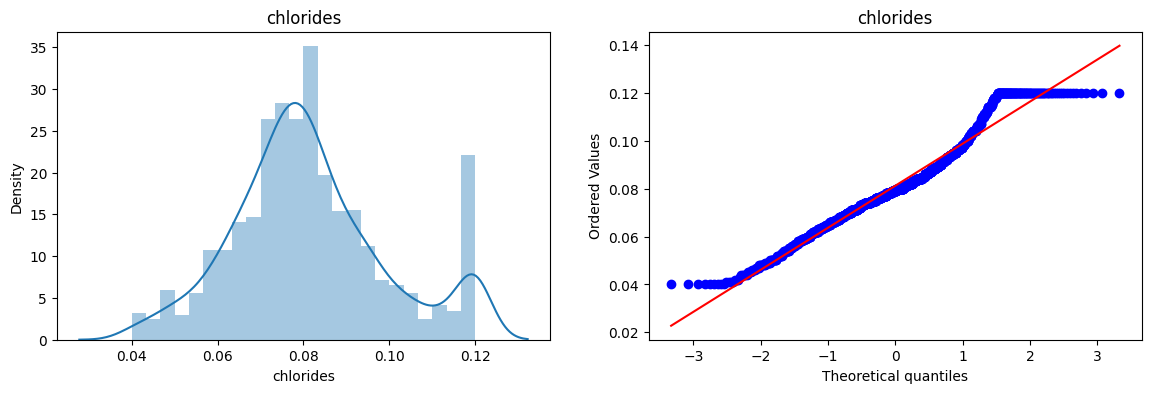

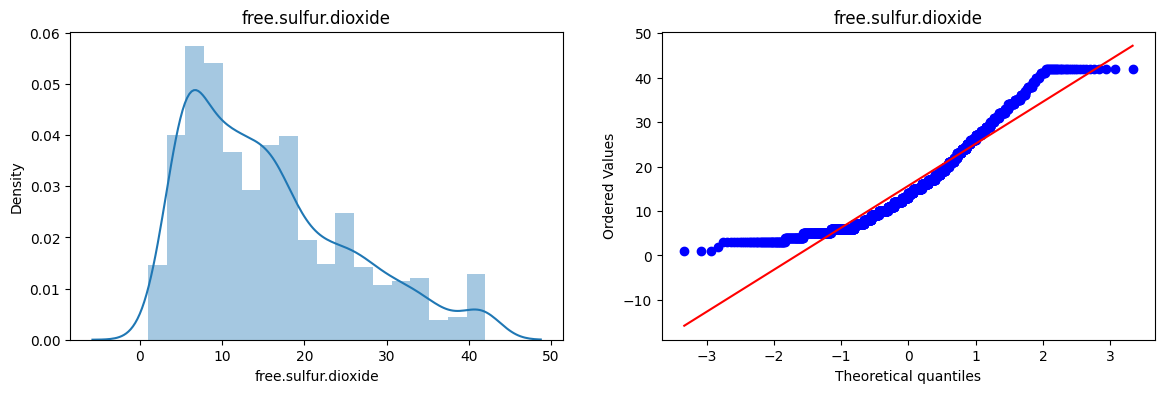

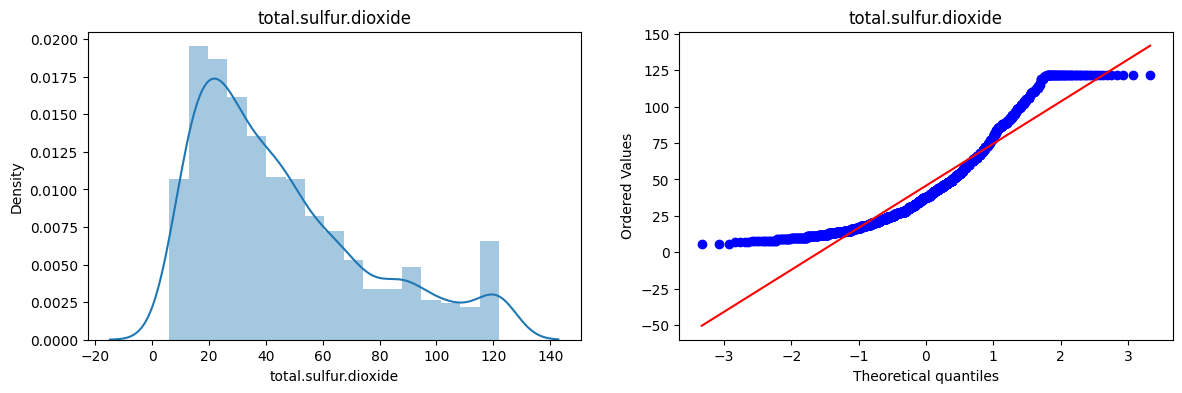

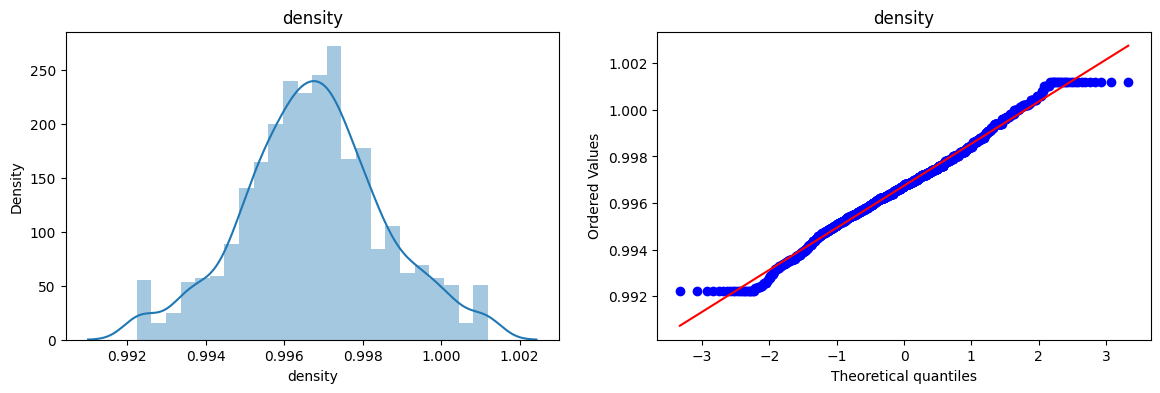

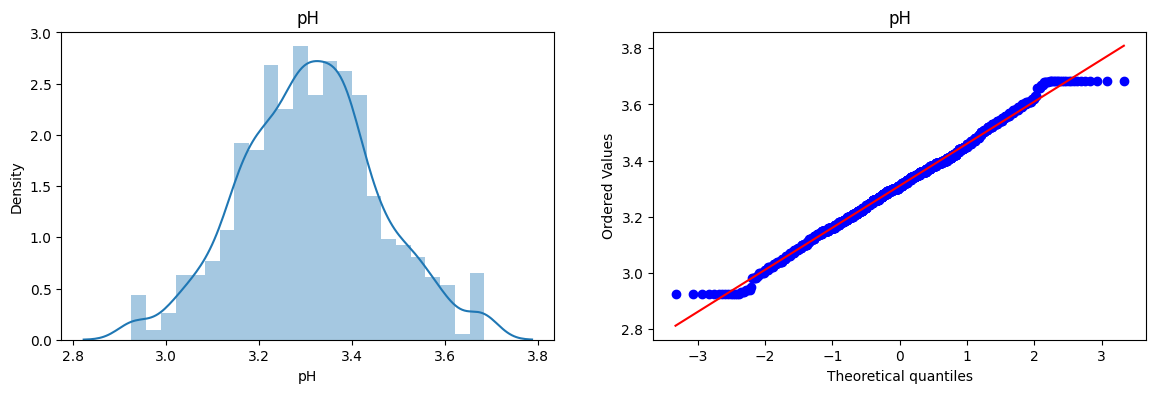

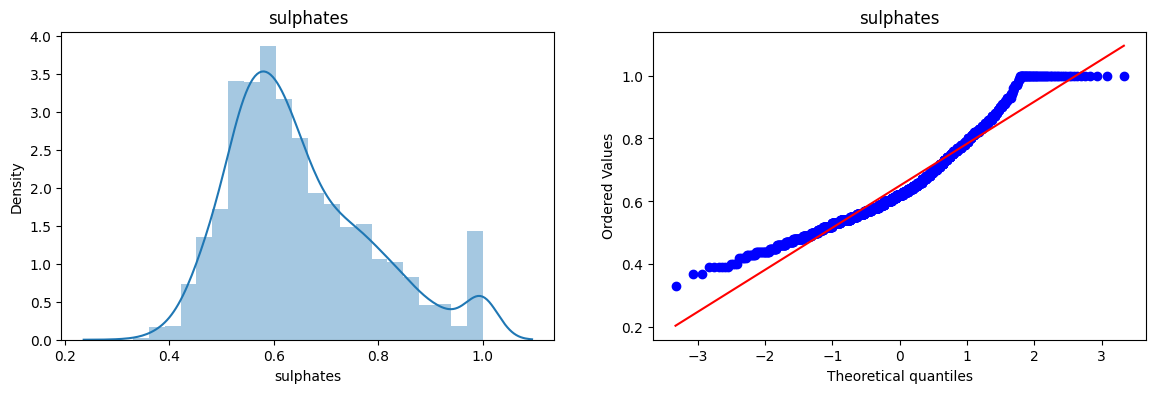

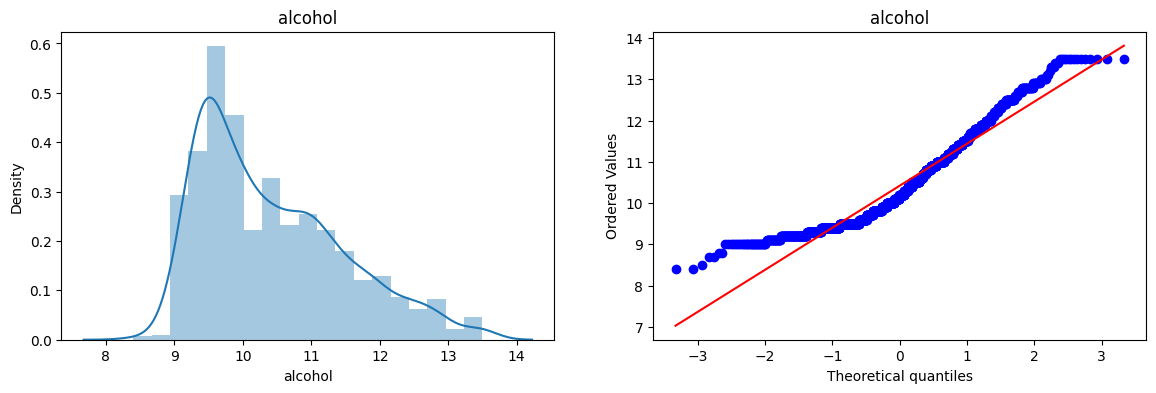

In [ ]:
# check if data is normally distributed or not
import scipy.stats as stats

for col in wine.columns.drop(['quality']):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(wine[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(wine[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()
    # fixed.acidity # citric acid  # residual sugar # free.sulphur.dioxide # total.sulphur.dioxide # sulphate # alcohol

* Most of the features are right skewed
* 'pH' and 'density' are normally distributed
* Need to transform the following features:
  * fixed.acidity
  * citric acid
  * residual sugar
  * free.sulphur.dioxide
  * total.sulphur.dioxide
  * sulphate
  * alcohol

### Transformation

In [ ]:
wine['fixed.acidity'] = np.sqrt(wine['volatile.acidity'])  # done
wine['citric.acid'] = np.sqrt(wine['citric.acid'])
wine['residual.sugar'] = np.log(wine['residual.sugar']) # ok
wine['free.sulfur.dioxide'] = np.log(wine['free.sulfur.dioxide'])
wine['total.sulfur.dioxide'] = np.log(wine['total.sulfur.dioxide']) #ok
wine['sulphates'] = np.sqrt(wine['sulphates'])
wine['alcohol'] = np.sqrt(wine['alcohol'])

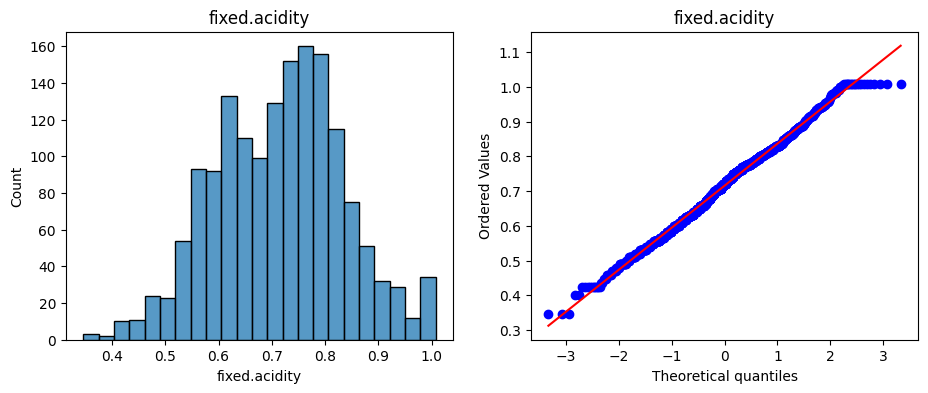

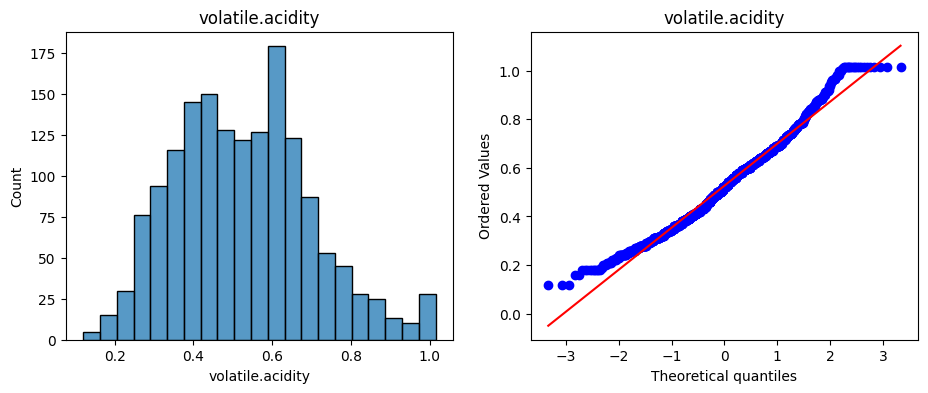

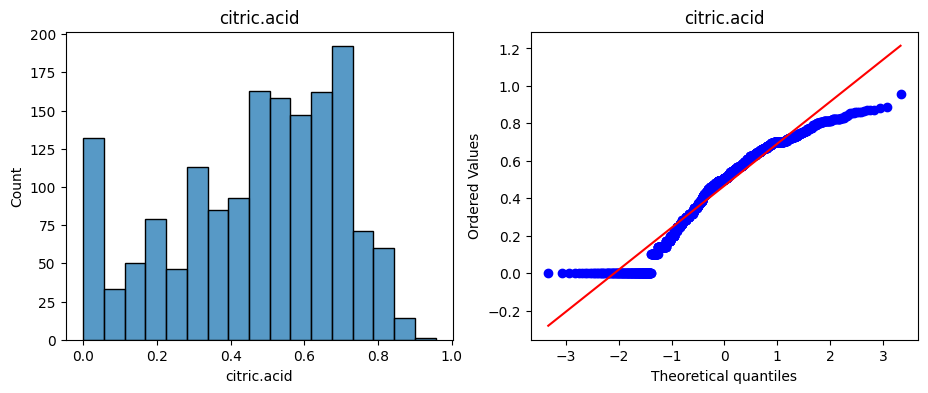

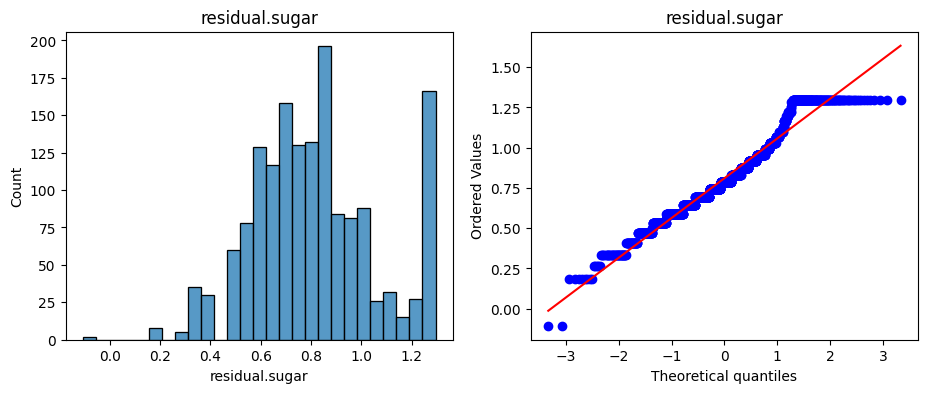

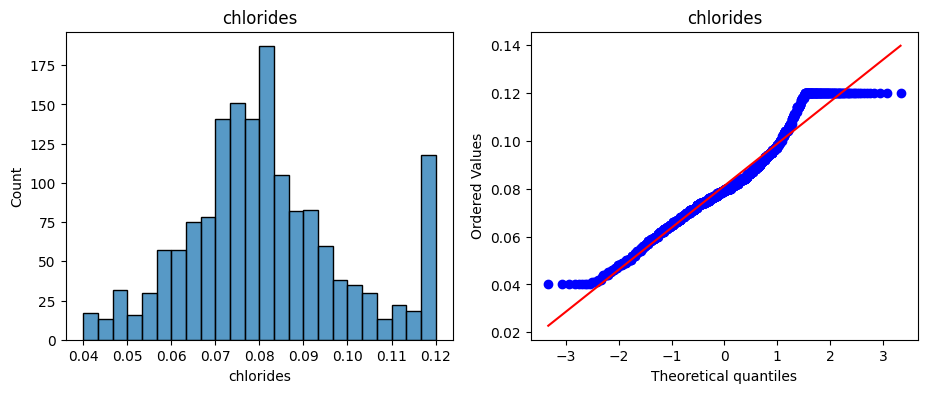

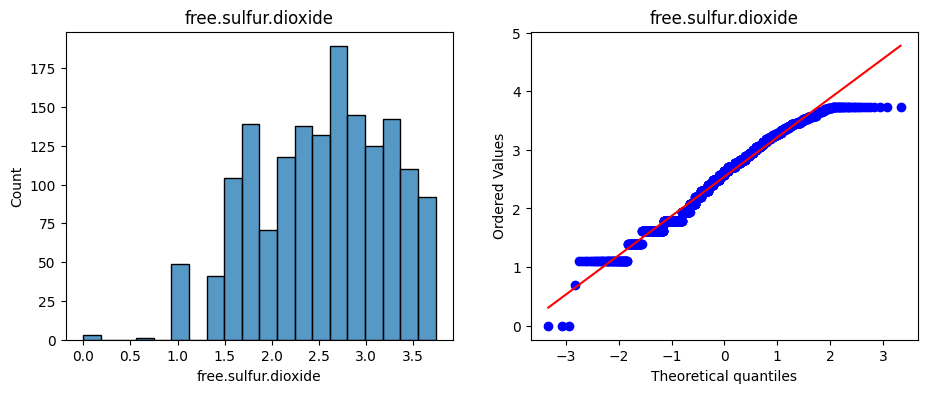

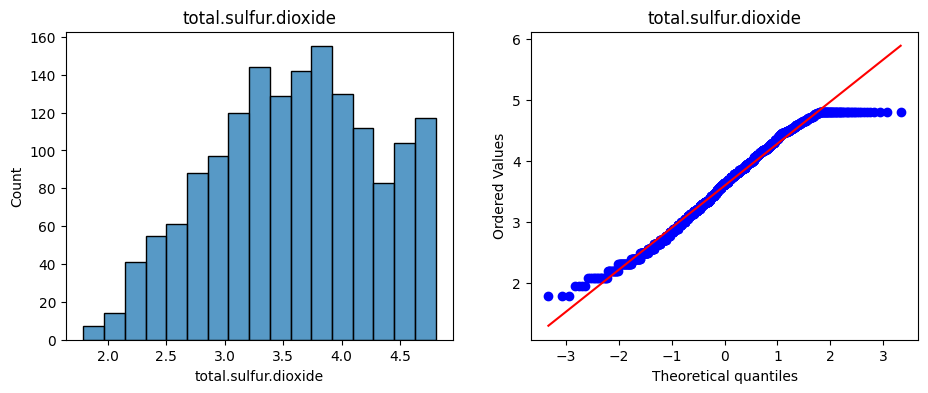

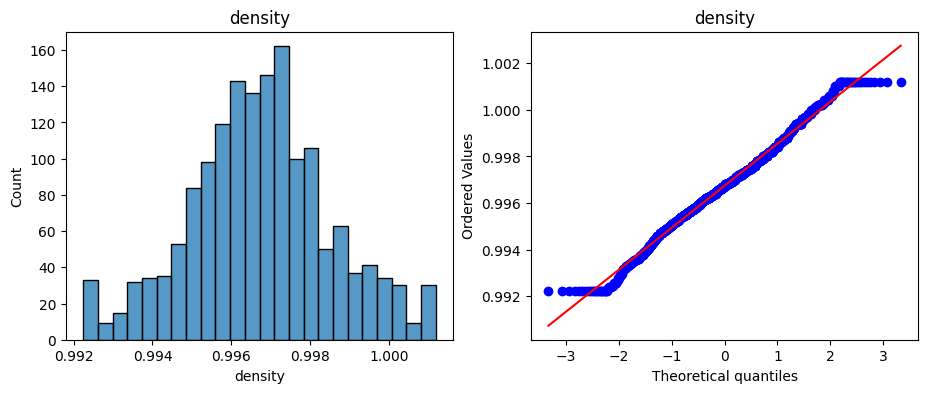

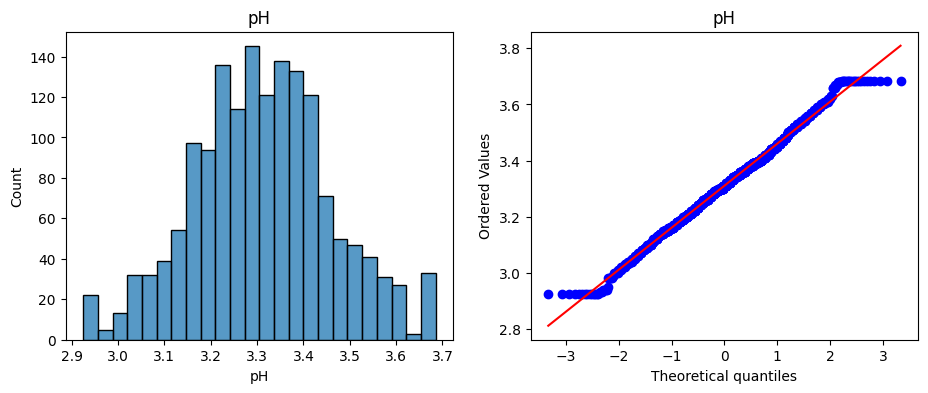

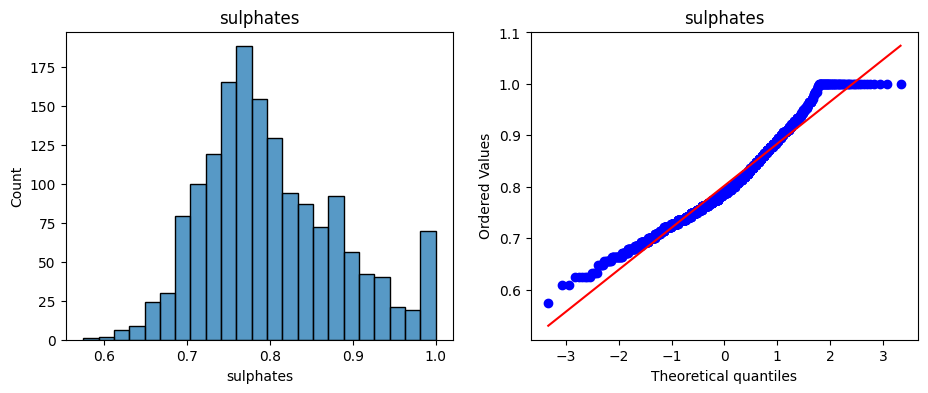

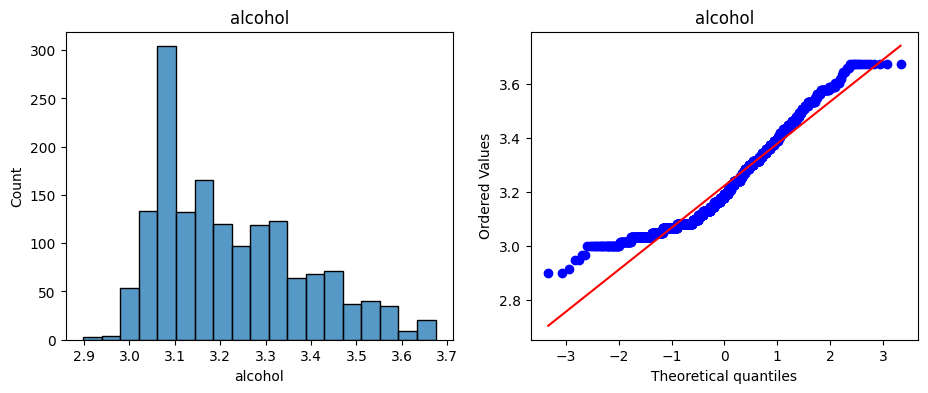

In [ ]:
import scipy.stats as stats

for col in wine.columns.drop(['quality']):
    plt.figure(figsize=(11,4))
    plt.subplot(1,2,1)
    sns.histplot(wine[col])
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(wine[col], dist="norm", plot=plt)
    plt.title(col)


### **Correlation**

<Axes: >

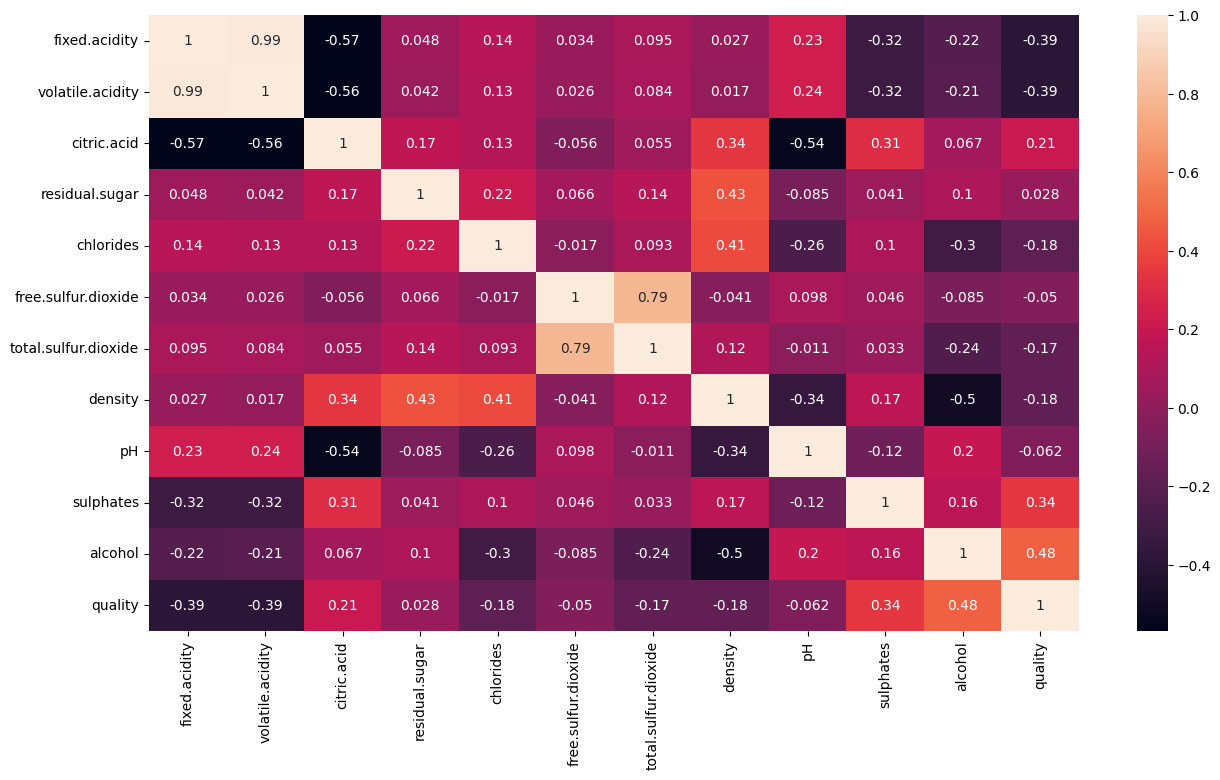

In [ ]:
# checking correlation
plt.figure(figsize = (15, 8))
sns.heatmap(wine.corr(), annot = True)

**Ploting Highest correlated Features with respect to wine quality**

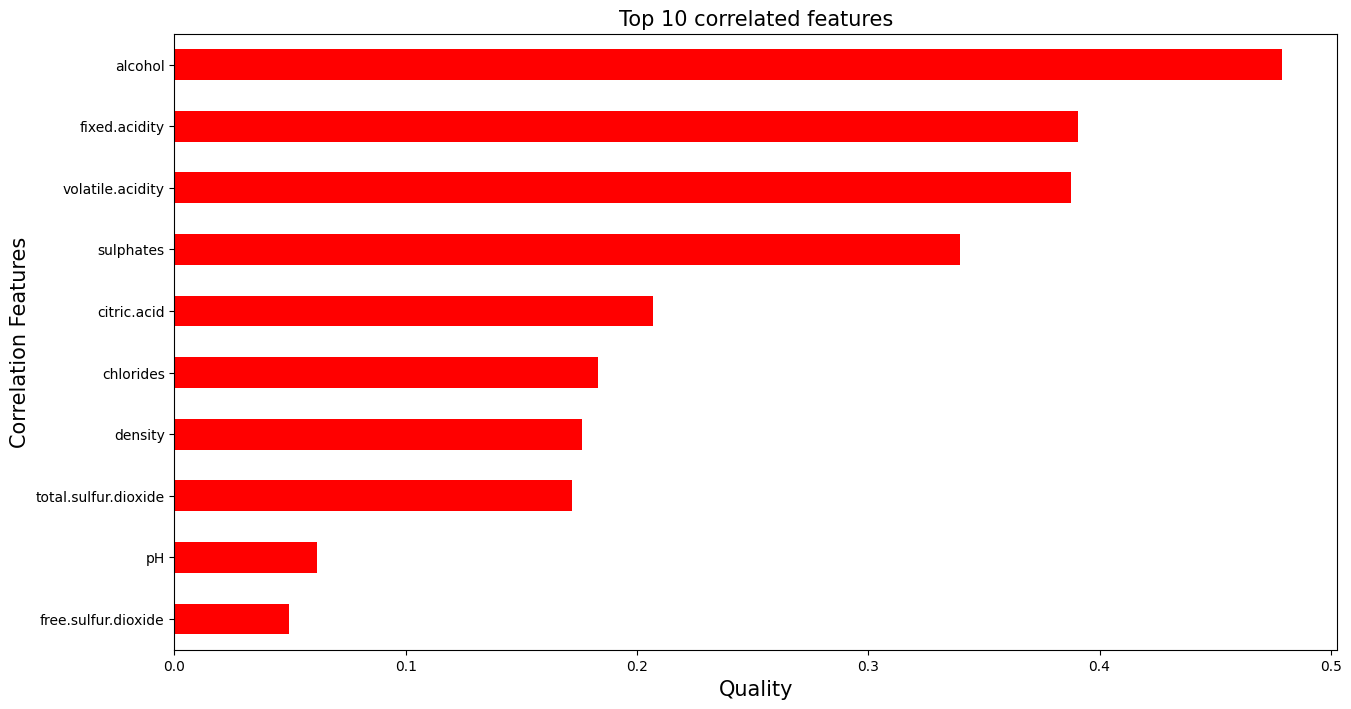

In [ ]:
plt.figure(figsize = (15, 8))
wine.corr()['quality'].apply(lambda x: abs(x)).sort_values(ascending=True).iloc[1:11].plot(kind='barh',color='red')
plt.title("Top 10 correlated features", fontsize = 15)
plt.ylabel('Correlation Features', fontsize = 15)
plt.xlabel('Quality', fontsize = 15)
plt.show()

### **Converting Target Variable into Classification Form**
* Taking wine quality values (3, 4, 5) as Bad Quality representing with 0
* Taking wine quality values (6, 7, 8) as Good Quality representing with 1

In [ ]:
reviews = []
for i in wine['quality']:
    if i >= 6:
        reviews.append(1) # Good Quality
    else:
        reviews.append(0)# Bad Quality

# Rename the column
wine['quality'] = reviews

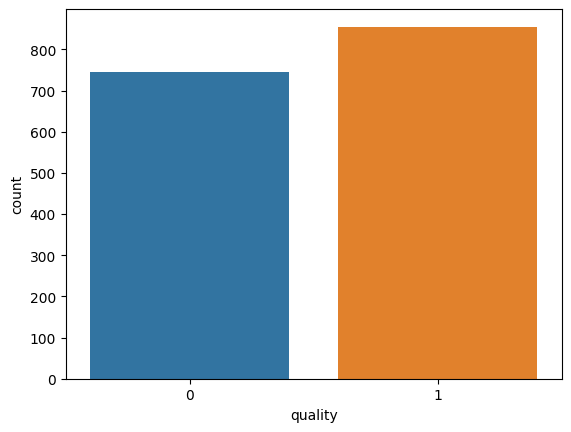

In [ ]:
# value counts of target variable
sns.countplot(x = 'quality', data = wine)
plt.show()

# Splitting the dataset

In [ ]:
# import train test split
from sklearn.model_selection import train_test_split

# differentiate independaent and target features
X = wine.drop(['quality'], axis = 1)
y = wine['quality']

# Splitting the data into train and test sets to use in models
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3 , random_state= 10)

# Feature scaling

In [ ]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

# apply scaling
scaler=StandardScaler()

# transforn data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building

## Logistic Regression

In [ ]:
# import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# apply model
logreg = LogisticRegression()
output = logreg.fit(X_train, y_train)

* **Prediction  and Accuracy on Train data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_train_pred = output.predict(X_train)

# Create a Classification report
print(classification_report(y_train, y_train_pred))

# Accurary
from sklearn.metrics import accuracy_score
print('Accuracy on Train Data is' , accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       516
           1       0.77      0.77      0.77       603

    accuracy                           0.75      1119
   macro avg       0.75      0.75      0.75      1119
weighted avg       0.75      0.75      0.75      1119

Accuracy on Train Data is 0.7479892761394102


* **Prediction  and Accuracy on Test data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_test_pred = output.predict(X_test)

# Create a Classification report
print(classification_report(y_test, y_test_pred))

# Accuracy
print('Accuracy on Test Data is' ,accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       228
           1       0.75      0.77      0.76       252

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480

Accuracy on Test Data is 0.74375


## Decision Tree Classifier

In [ ]:
# import decision tree
from sklearn.tree import DecisionTreeClassifier

# apply model
classifier = DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50,  # child
                                 min_samples_split=10, #parent
                                 max_depth=3)
output= classifier.fit(X_train, y_train)

* **Prediction  and Accuracy on Train data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_train_pred = output.predict(X_train)

# Create a Classification report
print(classification_report(y_train, y_train_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Train Data is' , accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.74      0.71      0.72       516
           1       0.76      0.79      0.77       603

    accuracy                           0.75      1119
   macro avg       0.75      0.75      0.75      1119
weighted avg       0.75      0.75      0.75      1119

Accuracy on Train Data is 0.7524575513851653


* **Prediction  and Accuracy on Test data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_test_pred = output.predict(X_test)

# Create a Classification report
print(classification_report(y_test, y_test_pred))
print('Accuracy on Test Data is' ,accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       228
           1       0.70      0.78      0.74       252

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480

Accuracy on Test Data is 0.7104166666666667


# Random Forest

In [ ]:
# import random forest
from sklearn.ensemble import RandomForestClassifier

# apply model
classifier = RandomForestClassifier(
                               n_estimators=25,       # make 25 tress
                               criterion="gini",      #splitter
                               max_depth=4,           # each tree will have 4 branches
                               min_samples_split=50,  # each tree will have parent node
                               min_samples_leaf=10,   # each tree will have Child node
                               max_features="sqrt")
output = classifier.fit(X_train, y_train)

<Axes: title={'center': 'Feature importances'}>

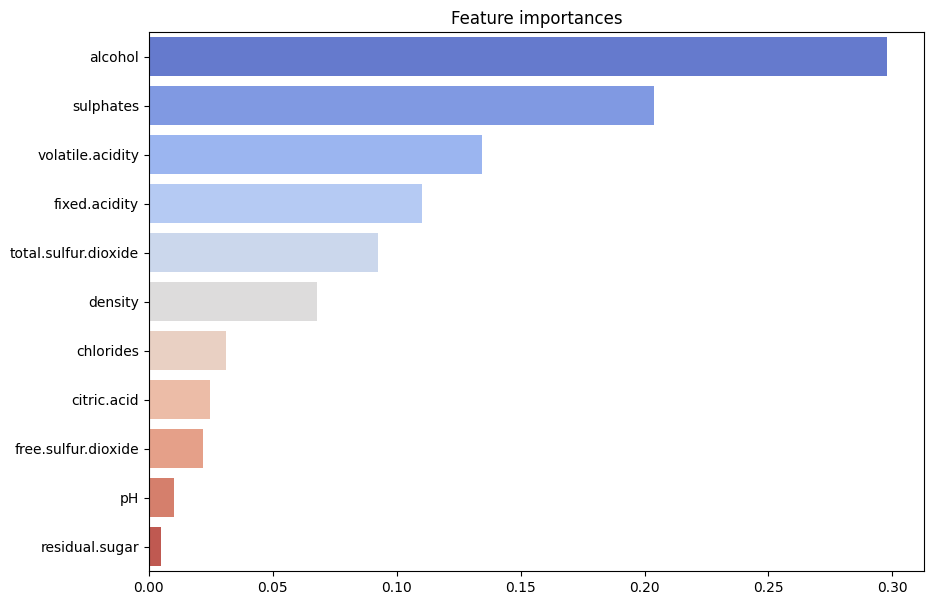

In [ ]:
# Plot features importances
imp = pd.Series(data=classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,7))
plt.title("Feature importances")
sns.barplot(y=imp.index, x=imp.values, palette="coolwarm", orient='h')

* **Prediction  and Accuracy on Train data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_train_pred = output.predict(X_train)

# Create a Classification report
print(classification_report(y_train, y_train_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Train Data is' , accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       516
           1       0.79      0.83      0.81       603

    accuracy                           0.79      1119
   macro avg       0.79      0.78      0.78      1119
weighted avg       0.79      0.79      0.78      1119

Accuracy on Train Data is 0.7855227882037533


* **Prediction  and Accuracy on Test data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_test_pred = output.predict(X_test)

# Create a Classification report
print(classification_report(y_test, y_test_pred))

# Accuracy
print('Accuracy on Test Data is' ,accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       228
           1       0.73      0.81      0.77       252

    accuracy                           0.75       480
   macro avg       0.75      0.74      0.75       480
weighted avg       0.75      0.75      0.75       480

Accuracy on Test Data is 0.7479166666666667


# KNN Algorithm

In [ ]:
# import knn
from sklearn.neighbors import KNeighborsClassifier

# apply model
classifier = KNeighborsClassifier(n_neighbors = 9)
output = classifier.fit(X_train, y_train)

* **Prediction  and Accuracy on Train data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_train_pred = output.predict(X_train)

# Create a Classification report
print(classification_report(y_train, y_train_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Train Data is' , accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       516
           1       0.80      0.84      0.82       603

    accuracy                           0.80      1119
   macro avg       0.80      0.80      0.80      1119
weighted avg       0.80      0.80      0.80      1119

Accuracy on Train Data is 0.7989276139410187


* **Prediction  and Accuracy on Test data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_test_pred = output.predict(X_test)

# Create a Classification report
print(classification_report(y_test, y_test_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Test Data is' ,accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       228
           1       0.72      0.80      0.76       252

    accuracy                           0.74       480
   macro avg       0.74      0.73      0.73       480
weighted avg       0.74      0.74      0.73       480

Accuracy on Test Data is 0.7354166666666667


In [ ]:
from sklearn.metrics import accuracy_score
for K in range(25):
    K_value = K+1
    result2 = KNeighborsClassifier(n_neighbors = K_value)
    result2.fit(X_train, y_train)
    y_pred_Train= result2.predict(X_train)
    y_pred_test = result2.predict(X_test)
    print("Train Accuracy is ",
          round(accuracy_score(y_train,y_pred_Train)*100,0), "      ","Test Accuracy is ", round(accuracy_score(y_test,y_pred_test)*100,0),"% for K-Value:",
          K_value)

Train Accuracy is  100.0        Test Accuracy is  74.0 % for K-Value: 1
Train Accuracy is  88.0        Test Accuracy is  72.0 % for K-Value: 2
Train Accuracy is  86.0        Test Accuracy is  74.0 % for K-Value: 3
Train Accuracy is  83.0        Test Accuracy is  73.0 % for K-Value: 4
Train Accuracy is  81.0        Test Accuracy is  72.0 % for K-Value: 5
Train Accuracy is  82.0        Test Accuracy is  74.0 % for K-Value: 6
Train Accuracy is  80.0        Test Accuracy is  72.0 % for K-Value: 7
Train Accuracy is  81.0        Test Accuracy is  73.0 % for K-Value: 8
Train Accuracy is  80.0        Test Accuracy is  74.0 % for K-Value: 9
Train Accuracy is  80.0        Test Accuracy is  74.0 % for K-Value: 10
Train Accuracy is  80.0        Test Accuracy is  73.0 % for K-Value: 11
Train Accuracy is  79.0        Test Accuracy is  73.0 % for K-Value: 12
Train Accuracy is  79.0        Test Accuracy is  73.0 % for K-Value: 13
Train Accuracy is  78.0        Test Accuracy is  74.0 % for K-Value: 14


# SVM

In [ ]:
# tune the parameter
model_parameters = { 'kernel':['linear'], 'C':[1, 10],'gamma': [0.0001] }

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import svc
from sklearn.svm import SVC
model = SVC(probability=True) # Support vector classifier

gscv = GridSearchCV(estimator=model, param_grid=model_parameters, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.0001], 'kernel': ['linear']},
             scoring='accuracy', verbose=1)

In [ ]:
# best parameter
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}


In [ ]:
# apply model
classifier = SVC(**gscv.best_params_)
output = classifier.fit(X_train, y_train)

* **Prediction  and Accuracy on Train data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_train_pred = output.predict(X_train)

# Create a Classification report
print(classification_report(y_train, y_train_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Train Data is' , accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       516
           1       0.78      0.75      0.76       603

    accuracy                           0.75      1119
   macro avg       0.75      0.75      0.75      1119
weighted avg       0.75      0.75      0.75      1119

Accuracy on Train Data is 0.7497765862377123


* **Prediction  and Accuracy on Test data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_test_pred = output.predict(X_test)

# Create a Classification report
print(classification_report(y_test, y_test_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Test Data is' ,accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       228
           1       0.75      0.76      0.76       252

    accuracy                           0.74       480
   macro avg       0.74      0.74      0.74       480
weighted avg       0.74      0.74      0.74       480

Accuracy on Test Data is 0.74375


# Naive Bayes

In [ ]:
# import GaussianNB
from sklearn.naive_bayes import GaussianNB

# apply model
classifier = GaussianNB()
output = classifier.fit(X_train, y_train)

* **Prediction  and Accuracy on Train data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_train_pred = output.predict(X_train)

# Create a Classification report
print(classification_report(y_train, y_train_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Train Data is' , accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73       516
           1       0.78      0.71      0.74       603

    accuracy                           0.73      1119
   macro avg       0.74      0.74      0.73      1119
weighted avg       0.74      0.73      0.73      1119

Accuracy on Train Data is 0.7345844504021448


* **Prediction  and Accuracy on Test data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_test_pred = output.predict(X_test)

# Create a Classification report
print(classification_report(y_test, y_test_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Test Data is' ,accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       228
           1       0.75      0.73      0.74       252

    accuracy                           0.73       480
   macro avg       0.73      0.73      0.73       480
weighted avg       0.73      0.73      0.73       480

Accuracy on Test Data is 0.7270833333333333


# Gradient Boosting

In [ ]:
# import xgboost
from sklearn.ensemble import GradientBoostingClassifier

# Define Model parameters to tune
model_parameters = {'n_estimators': [4, 5, 6], # number of tress
                    'max_depth':    [3, 4],   # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent        #parent

In [ ]:
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier()
gscv = GridSearchCV(estimator=model,
                    param_grid=model_parameters,
                    cv=5,
                    verbose=1,
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [3, 4],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [4, 5, 6]},
             scoring='accuracy', verbose=1)

In [ ]:
# best parameter
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 6}


In [ ]:
# Re-fit the model with the best parameters
final_mod = GradientBoostingClassifier(**gscv.best_params_)
output = final_mod.fit(X_train, y_train)

* **Prediction  and Accuracy on Train data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_train_pred = output.predict(X_train)

# Create a Classification report
print(classification_report(y_train, y_train_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Train Data is' , accuracy_score(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       516
           1       0.80      0.84      0.82       603

    accuracy                           0.80      1119
   macro avg       0.80      0.80      0.80      1119
weighted avg       0.80      0.80      0.80      1119

Accuracy on Train Data is 0.8016085790884718


* **Prediction  and Accuracy on Test data**

In [ ]:
# import classification report
from sklearn.metrics import classification_report

# Predict the target variable on the test data
y_test_pred = output.predict(X_test)

# Create a Classification report
print(classification_report(y_test, y_test_pred))

# Accuracy
from sklearn.metrics import accuracy_score
print('Accuracy on Test Data is' ,accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       228
           1       0.75      0.79      0.77       252

    accuracy                           0.75       480
   macro avg       0.75      0.75      0.75       480
weighted avg       0.75      0.75      0.75       480

Accuracy on Test Data is 0.75


## Gist of the  performance of each algorithm

In [ ]:
# Create a list of dictionaries with the algorithm names and corresponding accuracy scores
algorithms = [
    {'algorithm': 'Logistic Regression', 'train_acc': 0.75, 'test_acc': 0.74},
    {'algorithm': 'Decision Tree', 'train_acc': 0.75, 'test_acc': 0.71},
    {'algorithm': 'Random Forest', 'train_acc': 0.79, 'test_acc': 0.74},
    {'algorithm': 'Support Vector Machine', 'train_acc': 0.75, 'test_acc': 0.74},
    {'algorithm': 'Gradient Boosting', 'train_acc': 0.80, 'test_acc': 0.75},
    {'algorithm': 'KNN', 'train_acc': 0.80, 'test_acc': 0.74},
    {'algorithm': 'Naive Bayes', 'train_acc': 0.73, 'test_acc': 0.72},]

# Create the dataframe from the list of dictionaries
df = pd.DataFrame(algorithms)

# Print the dataframe
df

,algorithm,train_acc,test_acc
0,Logistic Regression,0.75,0.74
1,Decision Tree,0.75,0.71
2,Random Forest,0.79,0.74
3,Support Vector Machine,0.75,0.74
4,Gradient Boosting,0.80,0.75
5,KNN,0.80,0.74
6,Naive Bayes,0.73,0.72


***In conclusion, Gradient Boosting, Random Forest classifier and KNN  show the best overall performance for predicting the quality of the red wine.***

In [ ]:
import pickle
pickle.dump(output, open('red_wine.pkl', 'wb'))